In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [2]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
# 런타임 재시작 없이 폰트 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [4]:
# 설치된 나눔 폰트 경로 찾기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)  # 폰트 등록
plt.rc('font', family='NanumGothic')  # 기본 폰트 설정

In [5]:
!pip install dask[dataframe]

1. 파일 업로드 및 라이브러리 임포트

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/sample_submission.csv')

In [8]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2452
Test data length: 613
Sample_submission data length: 613


2. EDA

In [ ]:
train.head(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [9]:
# 전처리
# 결측치 처리 (중앙값으로 대체)
cols_to_fill = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']
for col in cols_to_fill:
    train[col].fillna(train[col].median(), inplace=True)

<ipython-input-9-fa9eb8c13e47>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [10]:
col_to_count = ['매물확인방식', '방향', '중개사무소', '제공플랫폼']
for col in col_to_count:
  print(train[col].value_counts())

매물확인방식
현장확인    1705
전화확인     382
서류확인     365
Name: count, dtype: int64
방향
남향     610
동향     605
서향     389
남동향    275
남서향    220
북향     198
북서향     80
북동향     75
Name: count, dtype: int64
중개사무소
G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
m75Dz8P6I7      1
A21Yr4B1U8      1
g11ci7P5V1      1
D26uW0Q2N3      1
L27JO3N6S2      1
Name: count, Length: 279, dtype: int64
제공플랫폼
A플랫폼    958
B플랫폼    610
C플랫폼    350
D플랫폼    184
E플랫폼    142
F플랫폼     63
G플랫폼     59
H플랫폼     34
I플랫폼     20
J플랫폼     12
L플랫폼     10
K플랫폼      8
M플랫폼      2
Name: count, dtype: int64


In [11]:
# 범주형 데이터 변환 (Target Encoding)
# Target Encoding (중개사무소, 제공플랫폼, 방향, 주차가능여부, 매물확인방식)
target_encoding_cols = ['중개사무소', '제공플랫폼', '방향', '주차가능여부', '매물확인방식']
target_encoding_map = {}  # Target Encoding 매핑 저장할 딕셔너리 추가

for col in target_encoding_cols:
    if col in train.columns:
        # train 데이터에서 타겟 인코딩
        mean_encoded = train.groupby(col)['허위매물여부'].mean()
        target_encoding_map[col] = mean_encoded.copy()
        train[col + '_enc'] = train[col].map(mean_encoded)

        # test 데이터에 타겟 인코딩 적용 (없는 값은 평균값으로 대체)
        if col in test.columns:
            test[col + '_enc'] = test[col].map(target_encoding_map[col]).fillna(target_encoding_map[col].mean())

    # 원본 컬럼 삭제
    train.drop(col, axis=1, inplace=True)
    if col in test.columns:
        test.drop(col, axis=1, inplace=True)

# 날짜 처리 (연, 월, 일 컬럼 추가 후 '게재일' 드랍)
train['게재일'] = pd.to_datetime(train['게재일'])
train['게재_연도'] = train['게재일'].dt.year
train['게재_월'] = train['게재일'].dt.month
train['게재_일'] = train['게재일'].dt.day
train.drop(['게재일'], axis=1, inplace=True)

# 최종 컬럼 선택
train.drop(['전용면적', '해당층', '총층'], axis=1, inplace=True)

# 확인
print(train.head())

           ID          보증금      월세   방수  욕실수  총주차대수  관리비  허위매물여부  중개사무소_enc  \
0  TRAIN_0000  402500000.0  470000  1.0  1.0   40.0   96       0   0.333333   
1  TRAIN_0001  170500000.0  200000  2.0  1.0   10.0    0       0   0.000000   
2  TRAIN_0002  114000000.0  380000  1.0  1.0   10.0    0       0   0.052632   
3  TRAIN_0003  163500000.0   30000  2.0  1.0   13.0   10       0   0.000000   
4  TRAIN_0004  346000000.0  530000  2.0  1.0   10.0    0       1   0.052632   

   제공플랫폼_enc    방향_enc  주차가능여부_enc  매물확인방식_enc  게재_연도  게재_월  게재_일  
0   0.104918  0.203085    0.080841    0.131378   2024    10     9  
1   0.201087  0.098182    0.162963    0.131378   2024    12    26  
2   0.125261  0.087603    0.162963    0.094241   2024    11    28  
3   0.125261  0.098182    0.080841    0.131378   2024    11    26  
4   0.104918  0.087603    0.162963    0.131378   2024     6    25  


In [12]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2452
Test data length: 613
Sample_submission data length: 613


In [13]:
train.head()

,ID,보증금,월세,방수,욕실수,총주차대수,관리비,허위매물여부,중개사무소_enc,제공플랫폼_enc,방향_enc,주차가능여부_enc,매물확인방식_enc,게재_연도,게재_월,게재_일
0,TRAIN_0000,402500000.0,470000,1.0,1.0,40.0,96,0,0.333333,0.104918,0.203085,0.080841,0.131378,2024,10,9
1,TRAIN_0001,170500000.0,200000,2.0,1.0,10.0,0,0,0.000000,0.201087,0.098182,0.162963,0.131378,2024,12,26
2,TRAIN_0002,114000000.0,380000,1.0,1.0,10.0,0,0,0.052632,0.125261,0.087603,0.162963,0.094241,2024,11,28
3,TRAIN_0003,163500000.0,30000,2.0,1.0,13.0,10,0,0.000000,0.125261,0.098182,0.080841,0.131378,2024,11,26
4,TRAIN_0004,346000000.0,530000,2.0,1.0,10.0,0,1,0.052632,0.104918,0.087603,0.162963,0.131378,2024,6,25


In [14]:
# 컬럼명 확인
print(train.columns)

Index(['ID', '보증금', '월세', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc',
       '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '게재_연도', '게재_월',
       '게재_일'],
      dtype='object')


In [15]:
# 컬럼명을 리스트로 변환
print(train.columns.tolist())

['ID', '보증금', '월세', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '게재_연도', '게재_월', '게재_일']


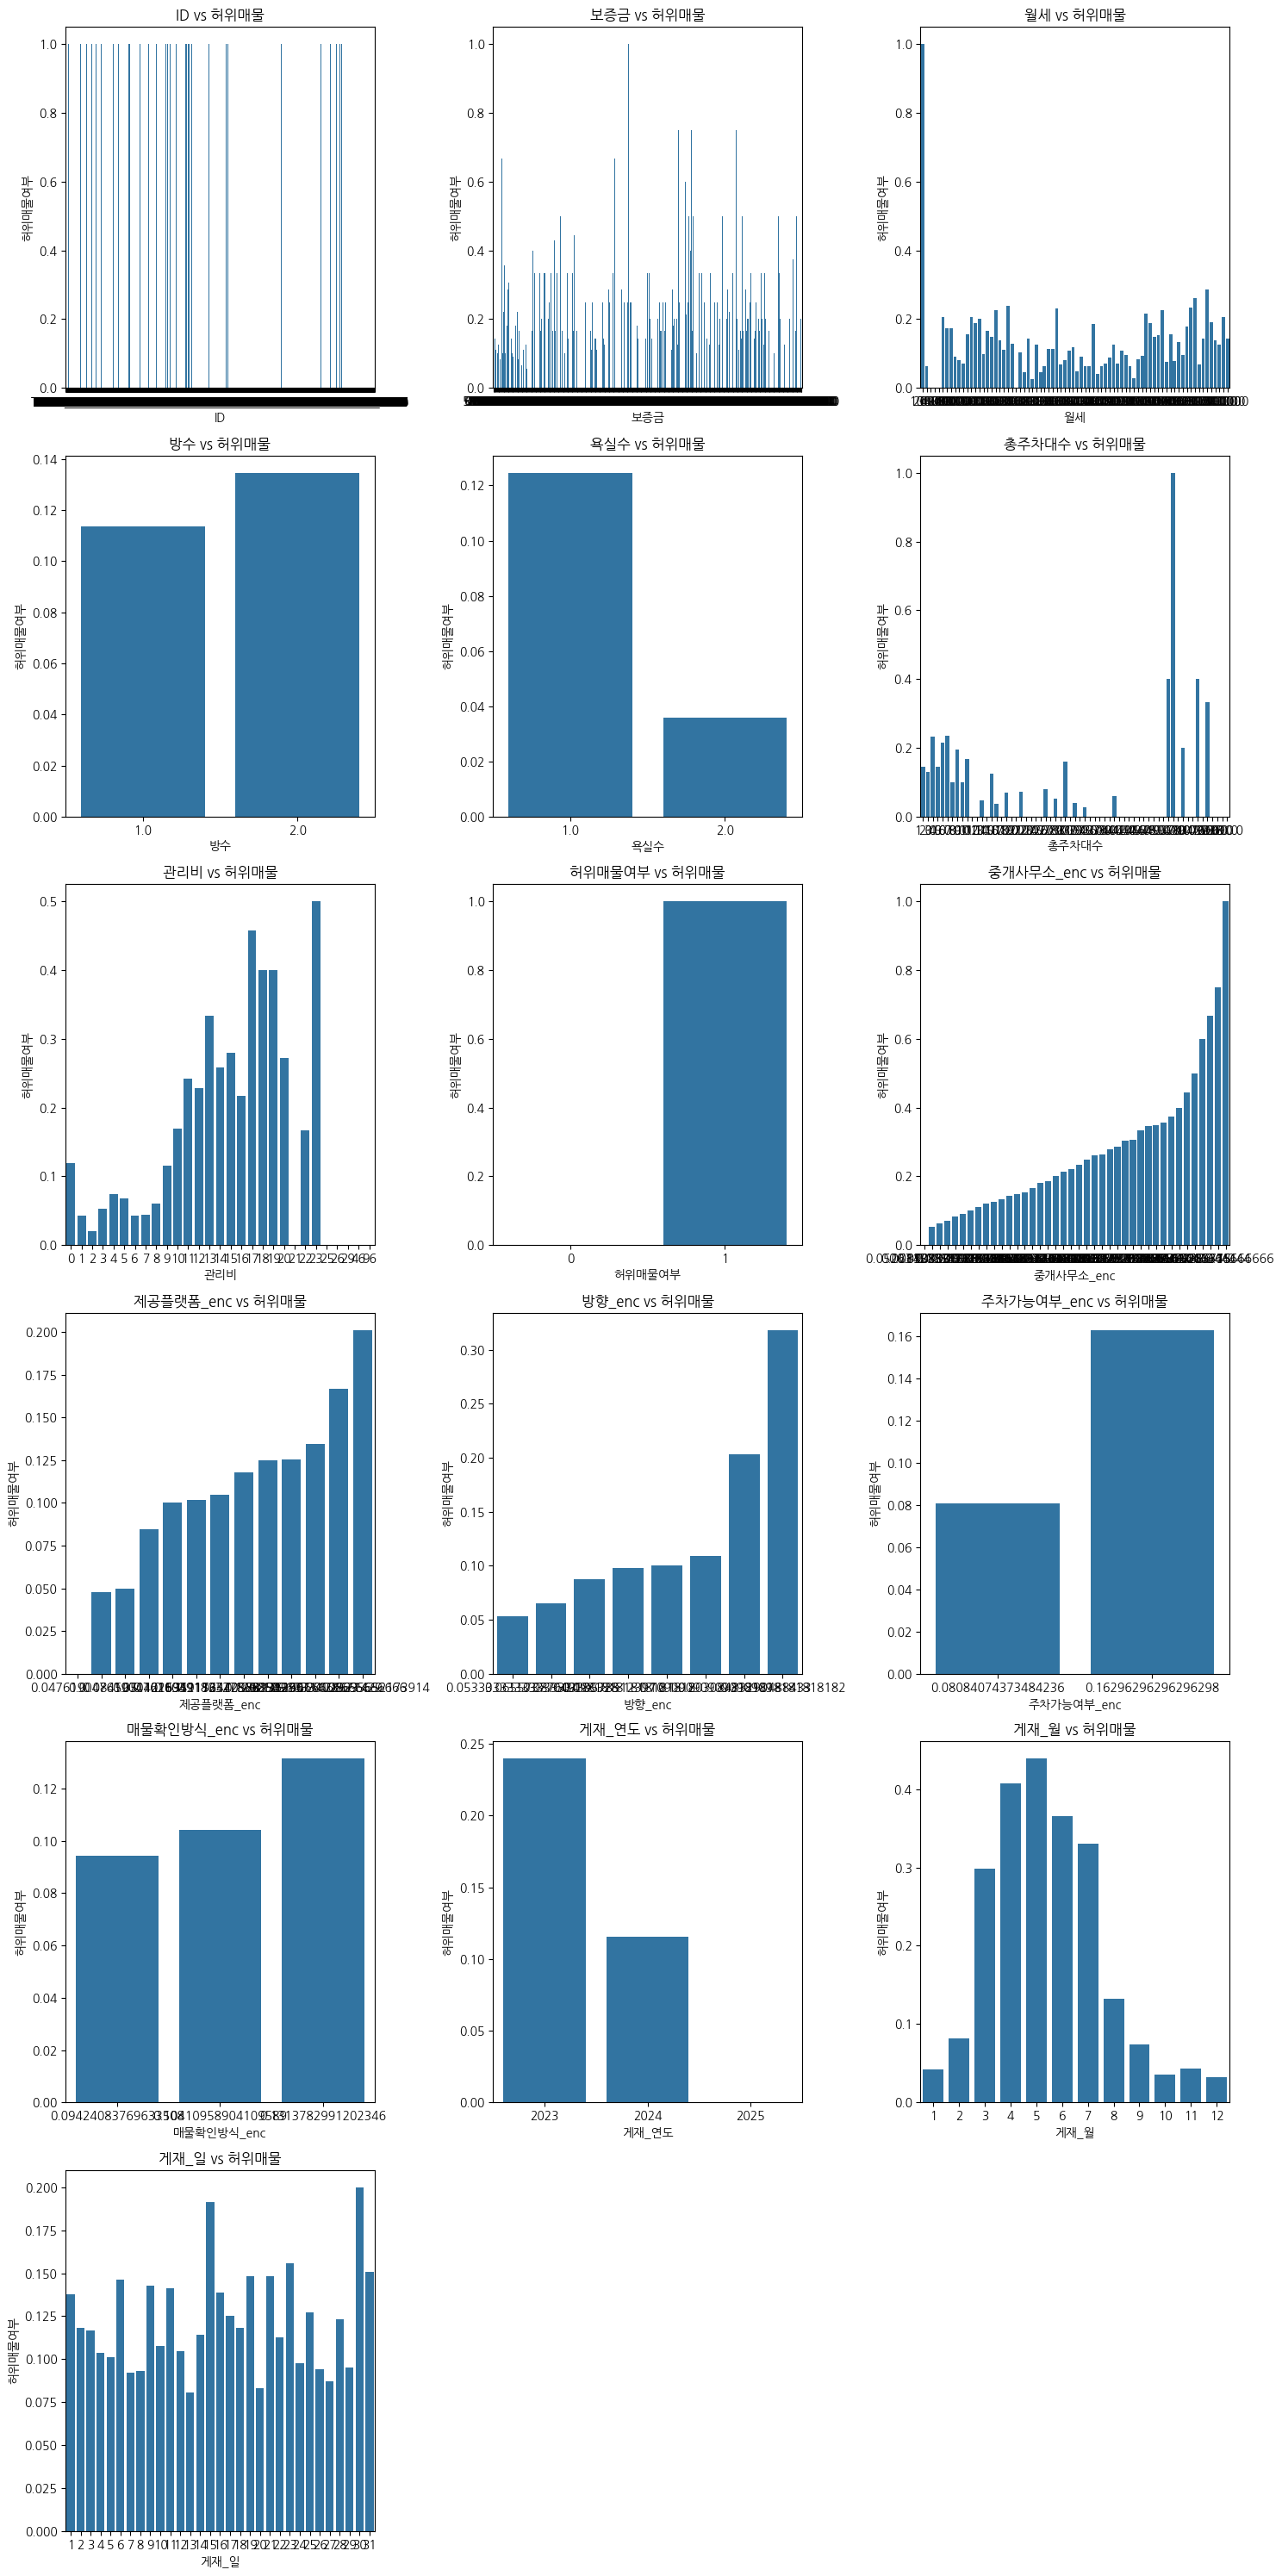

In [16]:
import math
categorical_cols = ['ID', '보증금', '월세', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '게재_연도', '게재_월', '게재_일']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.barplot(x=train[col], y=train['허위매물여부'], errorbar=None)  # `ci=None` 대신 `errorbar=None`
    plt.title(f"{col} vs 허위매물")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

<ipython-input-17-c159bdfdfa94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-17-c159bdfdfa94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-17-c159bdfdfa94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-17-c159bdfdfa94>:12: FutureWarning: 

Passing `palette` without assigning

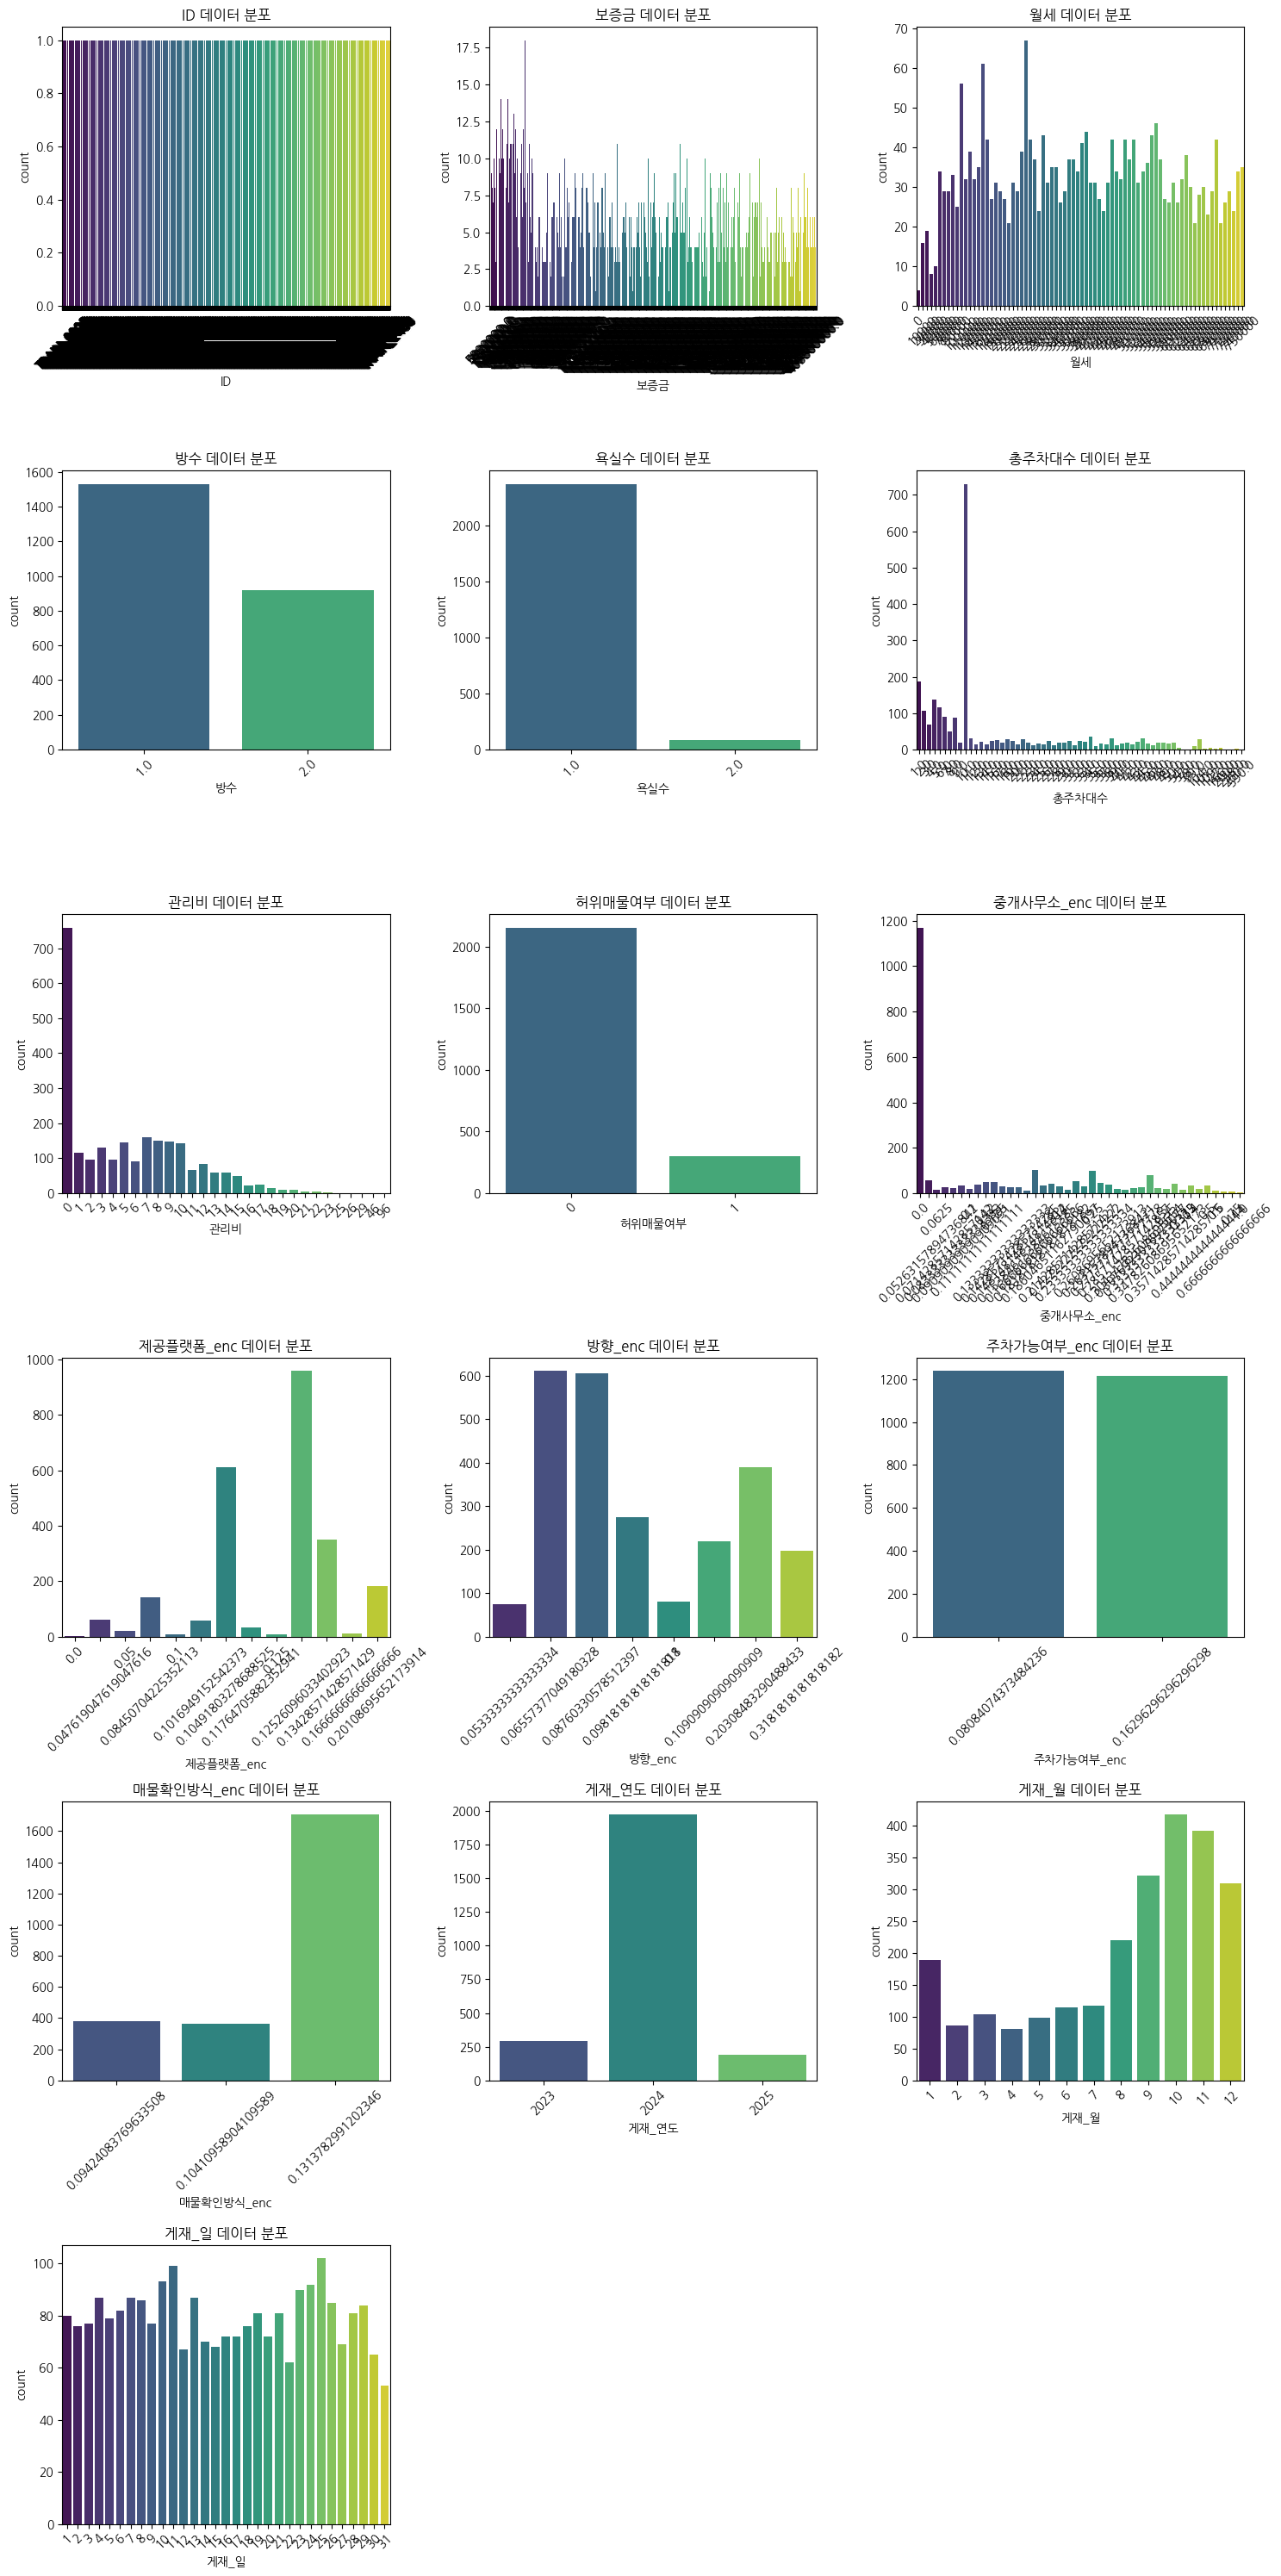

In [17]:
# 시각화할 범주형 변수 리스트
categorical_cols = ['ID', '보증금', '월세', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '게재_연도', '게재_월', '게재_일']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
    plt.xticks(rotation=45)  # X축 라벨 회전
    plt.title(f"{col} 데이터 분포")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [18]:
for col in categorical_cols:
    print(train.groupby(col)['허위매물여부'].mean().sort_values(ascending=False))
    print("="*50)

ID
TRAIN_1459    1.0
TRAIN_0865    1.0
TRAIN_0284    1.0
TRAIN_2206    1.0
TRAIN_0282    1.0
             ... 
TRAIN_0863    0.0
TRAIN_0862    0.0
TRAIN_0860    0.0
TRAIN_0859    0.0
TRAIN_2451    0.0
Name: 허위매물여부, Length: 2452, dtype: float64
보증금
130500000.0    1.000000
386000000.0    1.000000
343500000.0    0.857143
165000000.0    0.750000
335500000.0    0.750000
                 ...   
96000000.0     0.000000
95500000.0     0.000000
94500000.0     0.000000
171000000.0    0.000000
409000000.0    0.000000
Name: 허위매물여부, Length: 426, dtype: float64
월세
0         1.000000
700000    0.285714
670000    0.260870
210000    0.238095
660000    0.233333
            ...   
270000    0.027027
230000    0.000000
40000     0.000000
30000     0.000000
20000     0.000000
Name: 허위매물여부, Length: 76, dtype: float64
방수
2.0    0.134636
1.0    0.113651
Name: 허위매물여부, dtype: float64
욕실수
1.0    0.124578
2.0    0.035714
Name: 허위매물여부, dtype: float64
총주차대수
57.0     1.000000
109.0    0.400000
54.0     0.400000
166.

# **250228 메모**

- 관리비
- 보증금, 월세 포함
- 게재_연, 게재_월, 게재_일 포함
- 제공플랫폼_enc 포함
- 방향_enc 포함
- 중개사무소_enc 포함

# **test 데이터 처리**

In [19]:
test.head()

,ID,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,게재일,중개사무소_enc,제공플랫폼_enc,방향_enc,주차가능여부_enc,매물확인방식_enc
0,TEST_000,223000000.0,530000,NaN,5.0,5.0,1.0,1.0,NaN,7,2024-10-21,0.500000,0.201087,0.065574,0.162963,0.104110
1,TEST_001,150500000.0,590000,30.26,7.0,11.0,1.0,1.0,16.0,11,2023-09-02,0.000000,0.201087,0.203085,0.162963,0.104110
2,TEST_002,47000000.0,200000,41.50,2.0,3.0,2.0,1.0,NaN,0,2024-04-03,0.052632,0.104918,0.109091,0.162963,0.131378
3,TEST_003,133000000.0,250000,31.35,5.0,6.0,2.0,1.0,NaN,5,2024-09-19,0.000000,0.104918,0.065574,0.080841,0.104110
4,TEST_004,108000000.0,380000,23.14,2.0,3.0,1.0,1.0,NaN,0,2024-11-10,0.111111,0.125261,0.065574,0.162963,0.131378


In [20]:
# 전처리
# 결측치 처리 (중앙값으로 대체)
cols_to_fill_test = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']
for col in cols_to_fill_test:
    test[col].fillna(test[col].median(), inplace=True)

<ipython-input-20-c4149eedb36d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].median(), inplace=True)


In [21]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2452
Test data length: 613
Sample_submission data length: 613


In [22]:
# 날짜 처리
test['게재일'] = pd.to_datetime(test['게재일'])
test['게재_연도'] = test['게재일'].dt.year
test['게재_월'] = test['게재일'].dt.month
test['게재_일'] = test['게재일'].dt.day
test.drop(['게재일'], axis=1, inplace=True)

# 최종 컬럼 선택
test.drop(['전용면적', '해당층', '총층'], axis=1, inplace=True)

# 확인
print(test.head())

         ID          보증금      월세   방수  욕실수  총주차대수  관리비  중개사무소_enc  제공플랫폼_enc  \
0  TEST_000  223000000.0  530000  1.0  1.0   11.5    7   0.500000   0.201087   
1  TEST_001  150500000.0  590000  1.0  1.0   16.0   11   0.000000   0.201087   
2  TEST_002   47000000.0  200000  2.0  1.0   11.5    0   0.052632   0.104918   
3  TEST_003  133000000.0  250000  2.0  1.0   11.5    5   0.000000   0.104918   
4  TEST_004  108000000.0  380000  1.0  1.0   11.5    0   0.111111   0.125261   

     방향_enc  주차가능여부_enc  매물확인방식_enc  게재_연도  게재_월  게재_일  
0  0.065574    0.162963    0.104110   2024    10    21  
1  0.203085    0.162963    0.104110   2023     9     2  
2  0.109091    0.162963    0.131378   2024     4     3  
3  0.065574    0.080841    0.104110   2024     9    19  
4  0.065574    0.162963    0.131378   2024    11    10  


In [23]:
# 컬럼명을 리스트로 변환
print(train.columns.tolist())

['ID', '보증금', '월세', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '게재_연도', '게재_월', '게재_일']


In [24]:
keep_cols = ['관리비', '보증금', '월세', '게재_연도', '게재_월', '게재_일', '제공플랫폼_enc', '방향_enc', '중개사무소_enc', '허위매물여부']

train = train[keep_cols]

In [25]:
keep_cols_test = ['관리비', '보증금', '월세', '게재_연도', '게재_월', '게재_일', '제공플랫폼_enc', '방향_enc', '중개사무소_enc']

test = test[keep_cols_test]

In [26]:
print(len(test), len(sample_submission))

613 613


3. Modeling

In [27]:
# LightGBM & XGBoost
X = train.drop(columns=['허위매물여부'])
y = train['허위매물여부']

In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
# RandomForest 모델
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
print(f'RandomForest 평균 정확도: {np.mean(rf_scores):.4f}')

RandomForest 평균 정확도: 0.9613


In [30]:
# LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=300, max_depth=10, learning_rate=0.05, random_state=42)
lgb_scores = cross_val_score(lgb_model, X, y, cv=kf, scoring='accuracy')
print(f'LightGBM 평균 정확도: {np.mean(lgb_scores):.4f}')

[LightGBM] [Info] Number of positive: 235, number of negative: 1726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 1961, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119837 -> initscore=-1.993976
[LightGBM] [Info] Start training from score -1.993976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [31]:
# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.05, random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print(f'XGBoost 평균 정확도: {np.mean(xgb_scores):.4f}')

XGBoost 평균 정확도: 0.9666


In [43]:
# 피처 중요도 시각화
rf_model.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

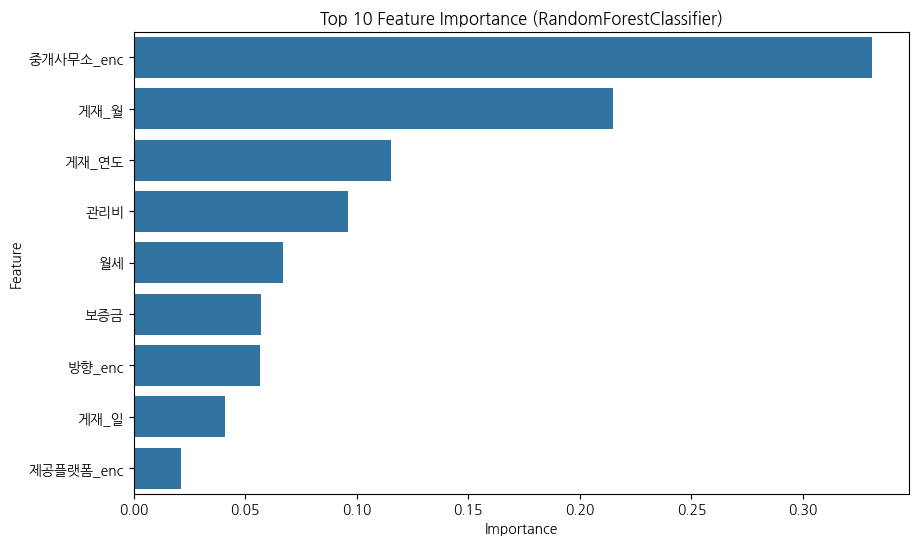

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances[:10])
plt.title('Top 10 Feature Importance (RandomForestClassifier)')
plt.show()

In [45]:
# test 데이터 예측
test_X = test

In [46]:
# 예측 수행
test_predictions = rf_model.predict(test_X)

In [47]:
# 결과 확인
print(test_predictions[:10])  # 상위 10개 출력

[0 0 0 0 0 0 0 0 0 0]


5. 제출파일 생성

In [48]:
print(len(test_predictions), len(sample_submission))

613 613


In [49]:
# 제출 파일 생성
sample_submission['허위매물여부'] = test_predictions

In [50]:
print(len(test_predictions), len(sample_submission))

613 613


In [51]:
sample_submission.head()

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [52]:
sample_submission.to_csv('250228_submission_rfmodel2.csv', index=False, encoding='utf-8-sig')